# State Value Function

We want to calculate $V_{\pi}(s)$ (the state-value-function given a policy)
![mdp.png](mdp.png)

# Policy Evaluation by Dynamic Programming (page 16)

In [17]:
import numpy as np

policy=np.array([[0.3, 0.2, 0.5], [0.5, 0.4, 0.1], [0.8, 0.1, 0.1]])
print('This is the optimal policy: {}')
rewards=np.array([10., 2., 3.])

state_value_function=np.array([0 for i in range(3)])

for i in range(20):
    print('V_{}={}'.format(i, state_value_function))
    state_value_function=rewards+0.1*(np.matmul(policy, state_value_function))
print('\nV={}'.format(state_value_function))

This is the optimal policy: 
V_0=[0 0 0]
V_1=[10.  2.  3.]
V_2=[10.49  2.61  3.85]
V_3=[10.5594  2.6674  3.9038]
V_4=[10.56532   2.673704  3.910464]
V_5=[10.56595688  2.6743188   3.91106728]
V_6=[10.56601845  2.67438127  3.91113041]
V_7=[10.5660247   2.67438748  3.91113659]
V_8=[10.56602532  2.6743881   3.91113722]
V_9=[10.56602538  2.67438816  3.91113728]
V_10=[10.56602539  2.67438817  3.91113729]
V_11=[10.56602539  2.67438817  3.91113729]
V_12=[10.56602539  2.67438817  3.91113729]
V_13=[10.56602539  2.67438817  3.91113729]
V_14=[10.56602539  2.67438817  3.91113729]
V_15=[10.56602539  2.67438817  3.91113729]
V_16=[10.56602539  2.67438817  3.91113729]
V_17=[10.56602539  2.67438817  3.91113729]
V_18=[10.56602539  2.67438817  3.91113729]
V_19=[10.56602539  2.67438817  3.91113729]

V=[10.56602539  2.67438817  3.91113729]


# Policy Evaluation by Linear Programming (page 15)

The state-value-function can be directly solved through linear programming (as shown on page 15):


In [2]:
solution=np.matmul(np.linalg.inv(np.eye(3)-0.1*policy), rewards)
print(solution)

[10.56602539  2.67438817  3.91113729]


The result stays the same.

# Monte Carlo Policy Evaluation (page 20)


Monte Carlo Policy Evaluation can also be used, whereby sampling is used to get to the same result

In [3]:
import random
from collections import defaultdict
reward_counter=np.array([0., 0., 0.])
visit_counter=np.array([0., 0., 0.])

def gt(rewardlist, gamma=0.1):
    '''
    Function to calculate the total discounted reward
    >>> gt([10, 2, 3], gamma=0.1)
    10.23
    '''
    summe=0
    for i, value in enumerate(rewardlist):
        summe+=(gamma**i)*value
    return summe


for i in range(400):
    start_state=random.randint(0, 2)
    next_state=start_state
    rewardlist=[]
    occurence=defaultdict(list) 
    for i in range(250):
        rewardlist.append(rewards[next_state]) 
        occurence[next_state].append(len(rewardlist)-1) 
        action=np.random.choice(np.arange(0, 3), p=policy[next_state]) 
        next_state=action

    for state in occurence: 
        for value in occurence[state]: 
            rew=gt(rewardlist[value:]) 
            reward_counter[state]+=rew 
            visit_counter[state]+=1 
            

print(reward_counter/visit_counter)

[10.56183091  2.67576503  3.90697973]


As can be seen the result is nearly the same as the state-value-function calculated above.

# Policy Optimization by Q-Learning (page 26)

This code solves a very easy problem: using the rewards it calculated the optimal action-value-function.

It samples a state-action pair randomly, so that all state-action pairs can be seen.

In [4]:
q_table=np.zeros((3, 3)) 
for i in range(1001): 
    state=random.randint(0, 2) 
    action=random.randint(0, 2) 
    next_state=action
    reward=rewards[next_state] 
    next_q=max(q_table[next_state]) 
    q_table[state, action]=q_table[state, action]+1*(reward+0.1*(next_q)-q_table[state, action]) #Q-Table update
    if i%100==0:
        print(q_table)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [10.  0.  0.]]
[[11.1111111   3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.1111111   3.11111111  4.11111111]]
[[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
[[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
[[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
[[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
[[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
[[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
[[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
[[11.11111

## Score Function Gradient Estimator (page 32)

/home/zam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/home/zam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
[1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.3, 1.0, 0.2, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 0.3, 1.0, 0.2, 0.2, 0.3, 0.2, 1.0, 0.2, 0.2, 0.3, 0.3, 0.2, 0.2, 1.0, 1.0, 0.3, 0.2]


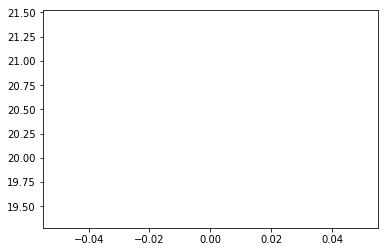

[[0.3311121  0.35448727 0.31440067]
 [0.32376012 0.33859208 0.33764783]
 [0.33838362 0.33453494 0.3270814 ]]
[1.0, 0.2, 1.0, 0.3, 0.3, 0.3, 0.3, 0.3, 1.0, 0.2, 0.2, 0.2, 1.0, 0.2, 1.0, 0.2, 0.3, 0.3, 1.0, 0.2, 0.3, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.3, 0.3, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 0.2, 1.0, 0.2]


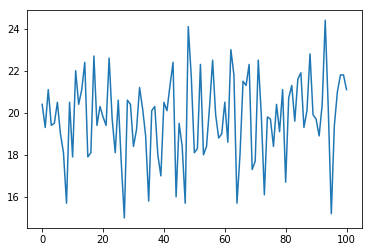

[[0.34550717 0.37772626 0.27676657]
 [0.32513085 0.31829086 0.3565782 ]
 [0.37803823 0.31612977 0.30583194]]
[1.0, 1.0, 0.2, 0.3, 0.3, 0.2, 1.0, 0.3, 0.3, 0.3, 1.0, 1.0, 1.0, 0.2, 0.3, 0.3, 1.0, 0.2, 0.3, 0.2, 0.2, 1.0, 0.2, 0.3, 0.2, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 0.3, 0.3, 0.3, 1.0, 1.0, 0.2, 0.2, 0.2, 0.3]


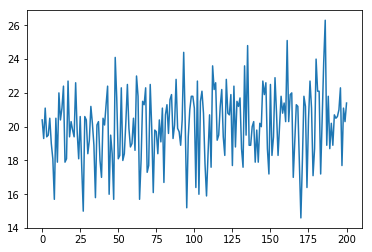

[[0.3874096  0.38356596 0.22902437]
 [0.34567142 0.27483052 0.3794981 ]
 [0.4466427  0.28483462 0.2685227 ]]
[1.0, 0.3, 1.0, 1.0, 0.2, 1.0, 0.3, 0.3, 1.0, 0.3, 0.3, 0.2, 0.3, 0.3, 0.2, 1.0, 1.0, 0.3, 1.0, 1.0, 0.2, 0.3, 0.3, 1.0, 0.3, 0.2, 1.0, 1.0, 1.0, 0.3, 0.3, 0.2, 1.0, 0.2, 1.0, 1.0, 1.0, 0.3, 0.3, 0.2]


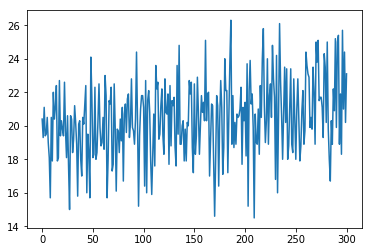

[[0.48704162 0.29316175 0.2197966 ]
 [0.37969238 0.22060995 0.39969766]
 [0.5692764  0.22116087 0.20956264]]
[1.0, 0.2, 0.2, 1.0, 0.2, 0.3, 0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 0.3, 0.2, 0.2, 1.0, 1.0, 0.2, 1.0, 0.2, 1.0, 0.3, 0.2, 1.0, 0.3, 0.2, 1.0, 0.3, 0.3, 1.0]


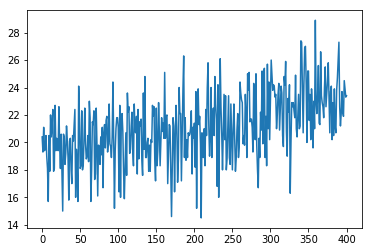

[[0.5428848  0.21695937 0.2401558 ]
 [0.4246428  0.17860276 0.3967544 ]
 [0.66391885 0.16742858 0.1686526 ]]
[0.3, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 0.2, 1.0, 0.3, 1.0, 0.3, 1.0, 0.3, 1.0, 0.2, 0.3, 1.0, 0.2, 1.0, 1.0, 0.3, 0.3, 1.0, 1.0, 0.2, 1.0, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 0.2, 0.3, 1.0, 1.0]


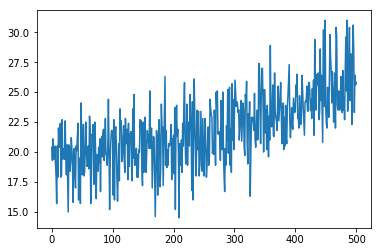

[[0.602032   0.15813752 0.23983051]
 [0.49753302 0.13401158 0.36845535]
 [0.7202753  0.13379198 0.14593272]]
[1.0, 1.0, 1.0, 0.3, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 0.3, 1.0, 0.3, 1.0, 0.3, 1.0, 1.0, 0.3, 0.3, 1.0, 0.3, 1.0, 1.0, 0.3, 1.0, 1.0, 0.2, 1.0, 0.3]


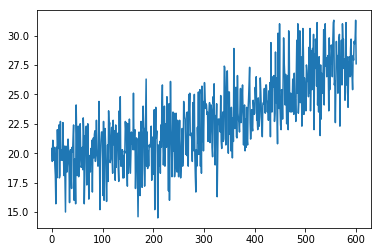

[[0.6817843  0.11094795 0.20726784]
 [0.58900565 0.09546298 0.3155314 ]
 [0.7606734  0.10856016 0.13076653]]
[0.3, 1.0, 1.0, 0.3, 0.2, 0.2, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.3, 1.0, 0.3, 1.0, 1.0, 0.2, 0.3, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 0.2, 0.2, 0.2, 0.3, 0.2, 0.3, 1.0, 1.0]


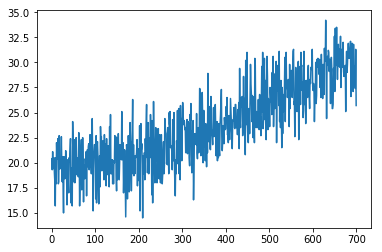

[[0.7502938  0.07390723 0.17579897]
 [0.68975186 0.06495804 0.24529012]
 [0.79029906 0.08576171 0.12393925]]
[0.3, 1.0, 1.0, 1.0, 0.3, 0.2, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0]


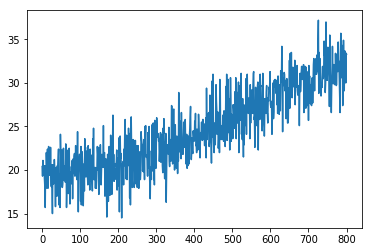

[[0.79054284 0.04802397 0.16143316]
 [0.7680805  0.04267325 0.1892462 ]
 [0.8353169  0.06249841 0.10218468]]
[0.2, 0.3, 0.3, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.3, 1.0, 0.2, 0.3, 1.0, 1.0, 1.0, 0.3]


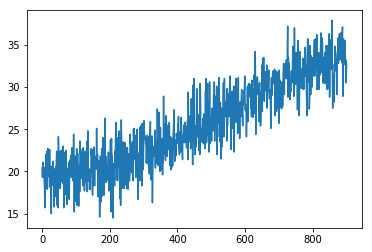

[[0.88132167 0.02498648 0.09369185]
 [0.8163055  0.02864636 0.15504807]
 [0.87113994 0.04344156 0.08541844]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 0.2, 1.0, 0.3, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0, 0.3, 1.0, 1.0]


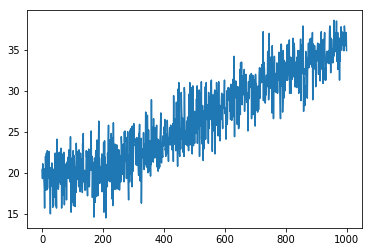

[[0.96310514 0.00862386 0.02827099]
 [0.86060786 0.0186467  0.12074547]
 [0.89711976 0.02954555 0.07333467]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


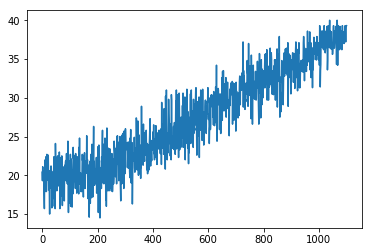

[[0.9902962  0.00272273 0.00698105]
 [0.89763975 0.01185056 0.09050964]
 [0.9139497  0.02017573 0.06587458]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


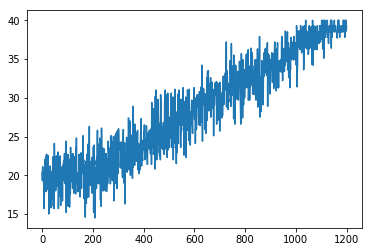

[[9.9731952e-01 8.9324737e-04 1.7872497e-03]
 [9.2758125e-01 7.3110987e-03 6.5107688e-02]
 [9.2869204e-01 1.3371538e-02 5.7936460e-02]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


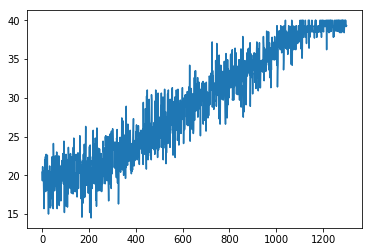

[[9.9925655e-01 2.8952854e-04 4.5381431e-04]
 [9.4954950e-01 4.4720490e-03 4.5978535e-02]
 [9.4145197e-01 8.6990474e-03 4.9848977e-02]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


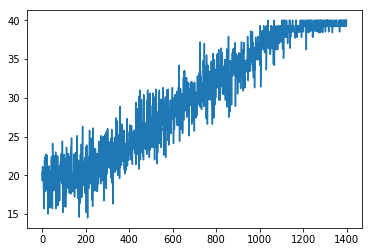

[[9.9979573e-01 9.1688758e-05 1.1266934e-04]
 [9.6464813e-01 2.7270247e-03 3.2624882e-02]
 [9.5085949e-01 5.6630727e-03 4.3477457e-02]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


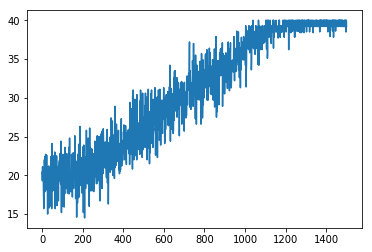

[[9.9994349e-01 2.8757366e-05 2.7718635e-05]
 [9.7440535e-01 1.6833268e-03 2.3911308e-02]
 [9.5774460e-01 3.7064792e-03 3.8548898e-02]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


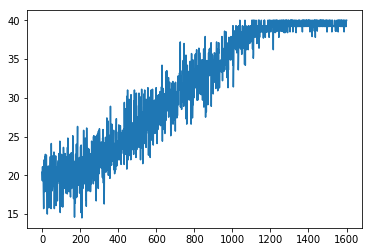

[[9.9998426e-01 8.9906862e-06 6.7974083e-06]
 [9.8146546e-01 1.0362095e-03 1.7498214e-02]
 [9.6341449e-01 2.4430901e-03 3.4142435e-02]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


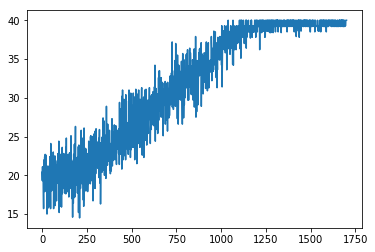

[[9.9999547e-01 2.8082309e-06 1.6654791e-06]
 [9.8667789e-01 6.3412363e-04 1.2687977e-02]
 [9.6870494e-01 1.5938779e-03 2.9701248e-02]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


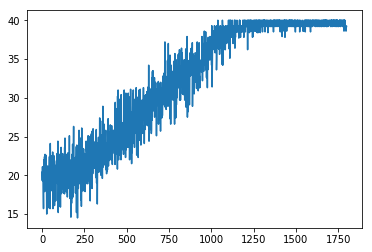

[[9.9999881e-01 8.7690415e-07 4.0797644e-07]
 [9.9048024e-01 3.8629246e-04 9.1334637e-03]
 [9.7292119e-01 1.0424088e-03 2.6036346e-02]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


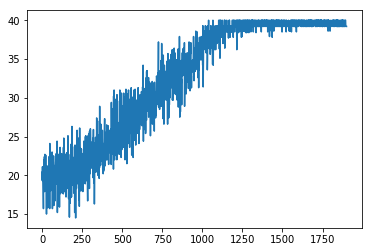

[[9.9999964e-01 2.7381125e-07 9.9932301e-08]
 [9.9323845e-01 2.3429809e-04 6.5272511e-03]
 [9.7670335e-01 6.7823799e-04 2.2618437e-02]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


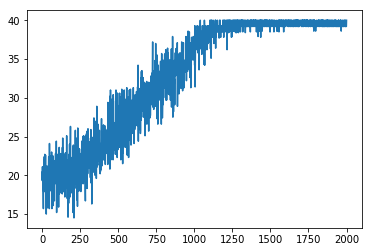

[[9.9999988e-01 8.5496872e-08 2.4478027e-08]
 [9.9516332e-01 1.4247946e-04 4.6941387e-03]
 [9.7997141e-01 4.4035859e-04 1.9588336e-02]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


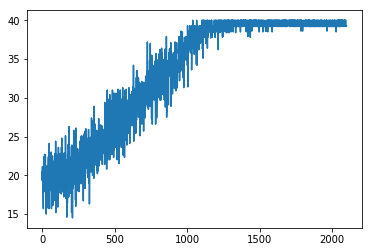

[[1.0000000e+00 2.6696176e-08 5.9957972e-09]
 [9.9653316e-01 8.6669679e-05 3.3801405e-03]
 [9.8281604e-01 2.8524306e-04 1.6898638e-02]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


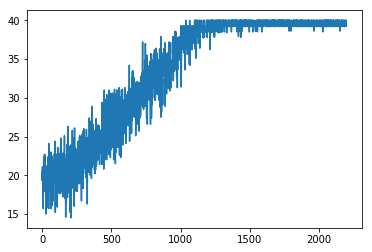

[[1.0000000e+00 8.3358112e-09 1.4686468e-09]
 [9.9751902e-01 5.2648433e-05 2.4283431e-03]
 [9.8516351e-01 1.8515624e-04 1.4651348e-02]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


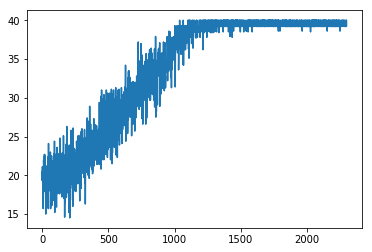

[[1.0000000e+00 2.6028353e-09 3.5973924e-10]
 [9.9822587e-01 3.1953870e-05 1.7421650e-03]
 [9.8709166e-01 1.2055050e-04 1.2787797e-02]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


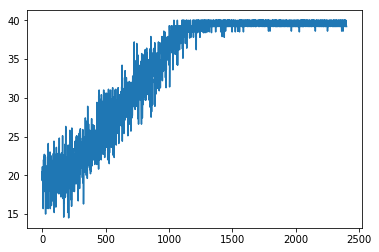

[[1.0000000e+00 8.1272850e-10 8.8117708e-11]
 [9.9873227e-01 1.9379815e-05 1.2483509e-03]
 [9.8834062e-01 7.9913167e-05 1.1579521e-02]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


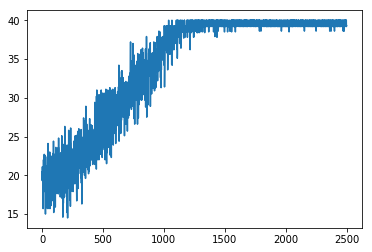

[[1.00000000e+00 2.53772336e-10 2.15851156e-11]
 [9.99094367e-01 1.17482678e-05 8.93807970e-04]
 [9.89277482e-01 5.34261744e-05 1.06691625e-02]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


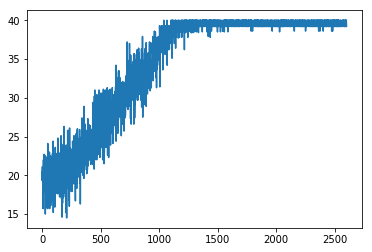

[[1.0000000e+00 7.9233252e-11 5.2870069e-12]
 [9.9935323e-01 7.1195009e-06 6.3959084e-04]
 [9.9019521e-01 3.5605470e-05 9.7691575e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


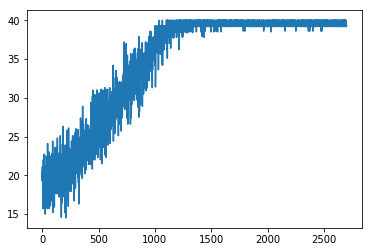

[[1.0000000e+00 2.4738017e-11 1.2949698e-12]
 [9.9953830e-01 4.3133027e-06 4.5747138e-04]
 [9.9107492e-01 2.3670342e-05 8.9014117e-03]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


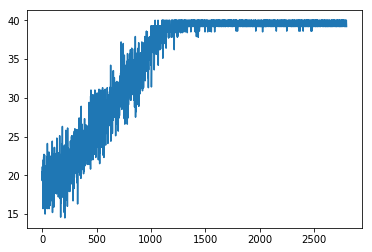

[[1.0000000e+00 7.7236446e-12 3.1718259e-13]
 [9.9967027e-01 2.6126681e-06 3.2709597e-04]
 [9.9171001e-01 1.5891679e-05 8.2741436e-03]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


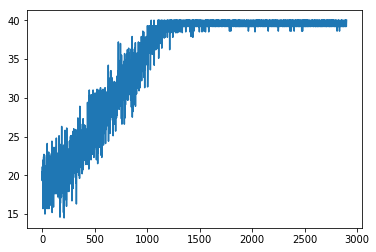

[[1.0000000e+00 2.4114578e-12 7.7688920e-14]
 [9.9976462e-01 1.5823347e-06 2.3382090e-04]
 [9.9224442e-01 1.0705860e-05 7.7447565e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


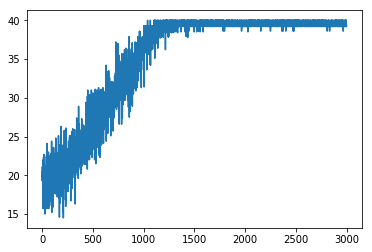

[[1.0000000e+00 7.5289959e-13 1.9028687e-14]
 [9.9983191e-01 9.5823509e-07 1.6711759e-04]
 [9.9269694e-01 7.2351449e-06 7.2958739e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


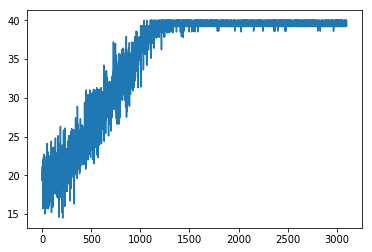

[[1.0000000e+00 2.3506850e-13 4.6607704e-15]
 [9.9987996e-01 5.8025046e-07 1.1942881e-04]
 [9.9310571e-01 4.8953184e-06 6.8894085e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


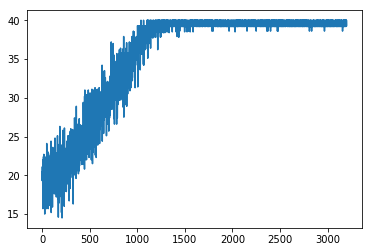

[[1.0000000e+00 7.3392532e-14 1.1415872e-15]
 [9.9991429e-01 3.5136088e-07 8.5345091e-05]
 [9.9345714e-01 3.3207134e-06 6.5395217e-03]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


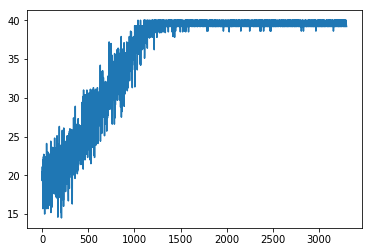

[[1.0000000e+00 2.2914440e-14 2.7961288e-16]
 [9.9993873e-01 2.1274231e-07 6.0981787e-05]
 [9.9380869e-01 2.2492547e-06 6.1890562e-03]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


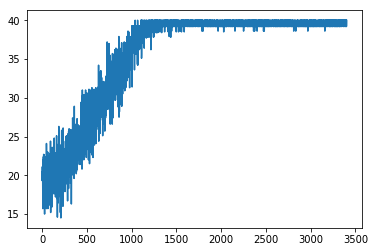

[[1.0000000e+00 7.1542918e-15 6.8487067e-17]
 [9.9995625e-01 1.2880805e-07 4.3571676e-05]
 [9.9415588e-01 1.5215827e-06 5.8425628e-03]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


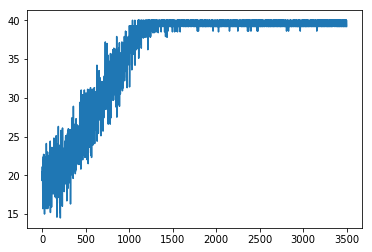

[[1.0000000e+00 2.2336958e-15 1.6774773e-17]
 [9.9996877e-01 7.7988403e-08 3.1131556e-05]
 [9.9450040e-01 1.0277447e-06 5.4985778e-03]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


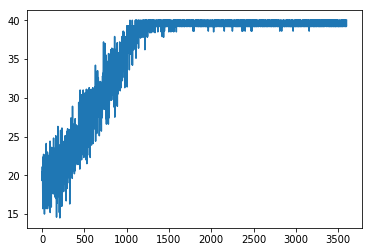

[[1.0000000e+00 6.9739918e-16 4.1087339e-18]
 [9.9997771e-01 4.7218862e-08 2.2242957e-05]
 [9.9484080e-01 6.9308476e-07 5.1584789e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


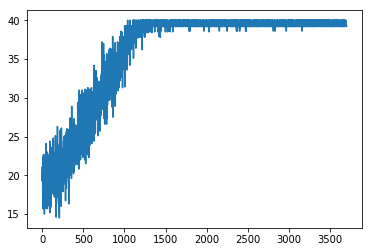

[[1.0000000e+00 2.1774030e-16 1.0063663e-18]
 [9.9998415e-01 2.8589058e-08 1.5891999e-05]
 [9.9517363e-01 4.6674165e-07 4.8258617e-03]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


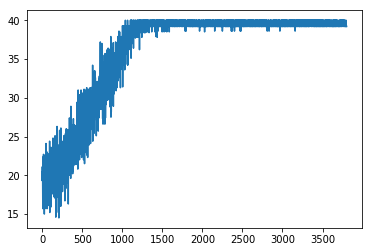

[[1.0000000e+00 6.7982355e-17 2.4649463e-19]
 [9.9998868e-01 1.7309455e-08 1.1354369e-05]
 [9.9547172e-01 3.1477103e-07 4.5279162e-03]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


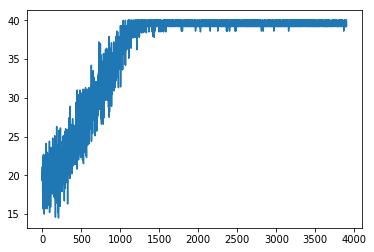

[[1.0000000e+00 2.1225289e-17 6.0371092e-20]
 [9.9999189e-01 1.0480102e-08 8.1123526e-06]
 [9.9562740e-01 2.1533981e-07 4.3722996e-03]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


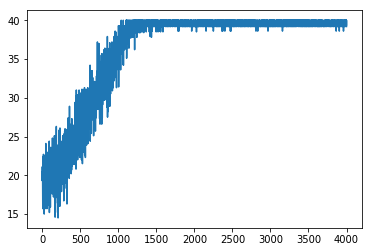

[[1.0000000e+00 6.6269087e-18 1.4785545e-20]
 [9.9999416e-01 6.3449379e-09 5.7960251e-06]
 [9.9574631e-01 1.4786464e-07 4.2536012e-03]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


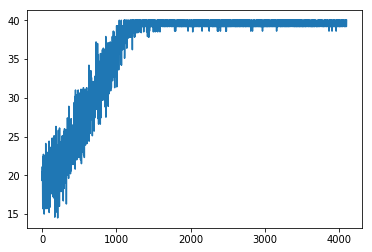

[[1.0000000e+00 2.0690376e-18 3.6211431e-21]
 [9.9999583e-01 3.8413948e-09 4.1410699e-06]
 [9.9587077e-01 1.0142121e-07 4.1290550e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


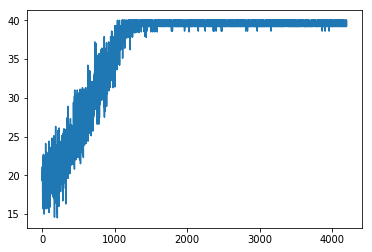

[[1.0000000e+00 6.4599001e-19 8.8685778e-22]
 [9.9999702e-01 2.3256819e-09 2.9586290e-06]
 [9.9600011e-01 6.9493055e-08 3.9997953e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


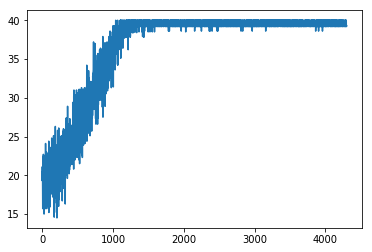

[[1.0000000e+00 2.0168945e-19 2.1720123e-22]
 [9.9999785e-01 1.4080288e-09 2.1138196e-06]
 [9.9613225e-01 4.7574222e-08 3.8677426e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


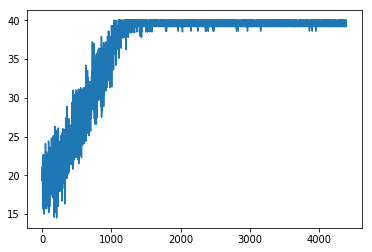

[[1.0000000e+00 6.2973402e-20 5.3197006e-23]
 [9.9999845e-01 8.5245733e-10 1.5102388e-06]
 [9.9626839e-01 3.2531947e-08 3.7315732e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


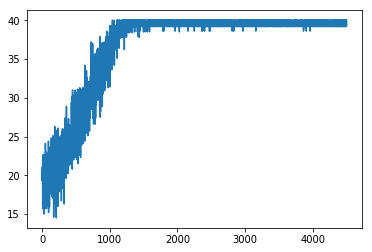

[[1.0000000e+00 1.9665154e-20 1.3031017e-23]
 [9.9999893e-01 5.1609983e-10 1.0790036e-06]
 [9.9640697e-01 2.2223606e-08 3.5929999e-03]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


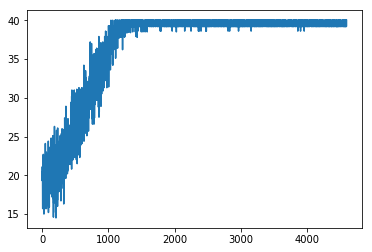

[[1.0000000e+00 6.1409788e-21 3.1920483e-24]
 [9.9999928e-01 3.1246022e-10 7.7090436e-07]
 [9.9654526e-01 1.5171054e-08 3.4547693e-03]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


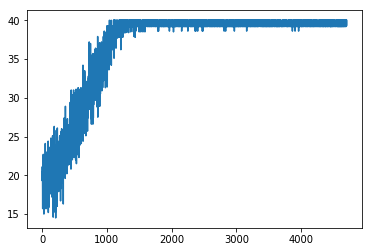

[[1.00000000e+00 1.91768739e-21 7.81916908e-25]
 [9.99999404e-01 1.89171470e-10 5.50779305e-07]
 [9.96684015e-01 1.03474775e-08 3.31601221e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


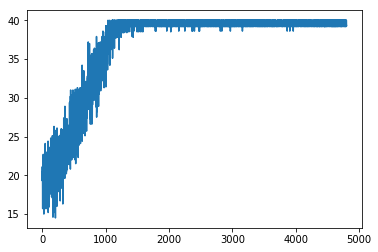

[[1.00000000e+00 5.98849986e-22 1.91536599e-25]
 [9.99999642e-01 1.14529296e-10 3.93509453e-07]
 [9.96822476e-01 7.05164194e-09 3.17747891e-03]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


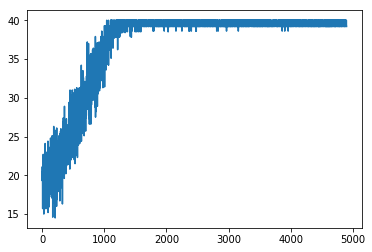

[[1.0000000e+00 1.8700718e-22 4.6918368e-26]
 [9.9999976e-01 6.9338993e-11 2.8114624e-07]
 [9.9696034e-01 4.8015107e-09 3.0395901e-03]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


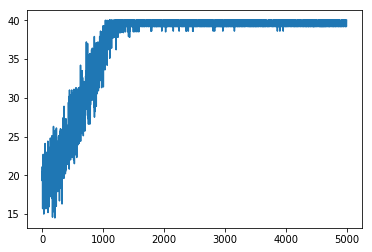

[[1.0000000e+00 5.8398073e-23 1.1493017e-26]
 [9.9999976e-01 4.1979604e-11 2.0086753e-07]
 [9.9709725e-01 3.2665735e-09 2.9027117e-03]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


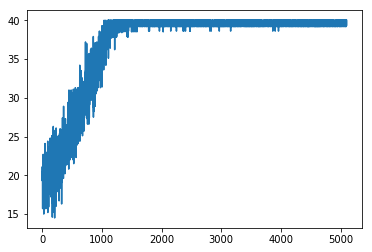

[[1.0000000e+00 1.8236385e-23 2.8153034e-27]
 [9.9999988e-01 2.5415534e-11 1.4351278e-07]
 [9.9723250e-01 2.2205215e-09 2.7675114e-03]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


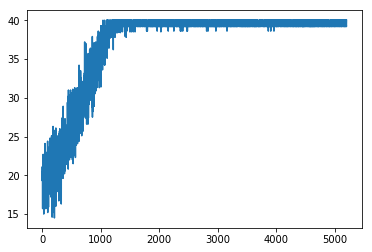

[[1.00000000e+00 5.69480620e-24 6.89630350e-28]
 [9.99999881e-01 1.53872175e-11 1.02535196e-07]
 [9.97365296e-01 1.50834856e-09 2.63476465e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


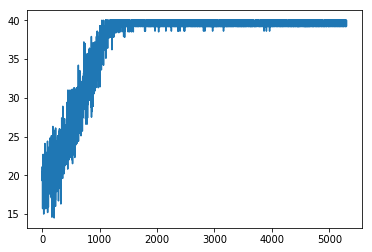

[[1.0000000e+00 1.7783579e-24 1.6893027e-28]
 [9.9999988e-01 9.3158181e-12 7.3258065e-08]
 [9.9749482e-01 1.0239359e-09 2.5052419e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


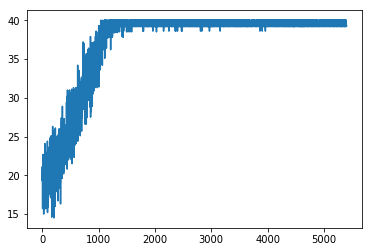

[[1.0000000e+00 5.5534062e-25 4.1380778e-29]
 [1.0000000e+00 5.6400362e-12 5.2340503e-08]
 [9.9762160e-01 6.9456518e-10 2.3784498e-03]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


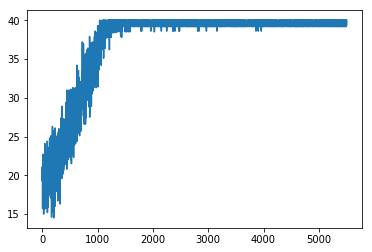

[[1.0000000e+00 1.7342019e-25 1.0136541e-29]
 [1.0000000e+00 3.4146228e-12 3.7395587e-08]
 [9.9774504e-01 4.7082660e-10 2.2550479e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


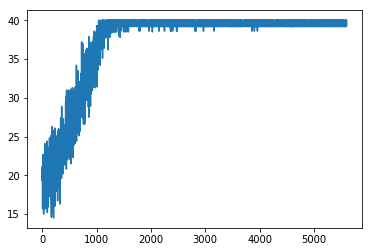

[[1.0000000e+00 5.4155166e-26 2.4830242e-30]
 [1.0000000e+00 2.0673003e-12 2.6717927e-08]
 [9.9786514e-01 3.1892078e-10 2.1348421e-03]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


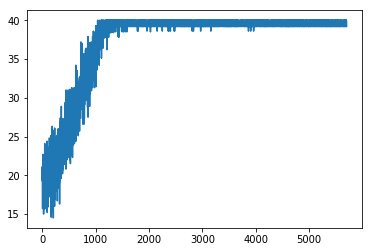

[[1.0000000e+00 1.6911421e-26 6.0823595e-31]
 [1.0000000e+00 1.2515968e-12 1.9089089e-08]
 [9.9798113e-01 2.1591075e-10 2.0189171e-03]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


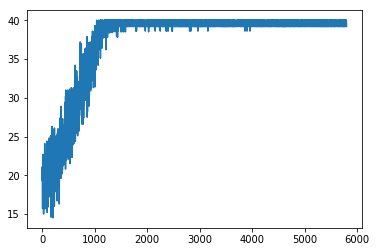

[[1.0000000e+00 5.2810505e-27 1.4899210e-31]
 [1.0000000e+00 7.5774890e-13 1.3638532e-08]
 [9.9809295e-01 1.4608799e-10 1.9070712e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


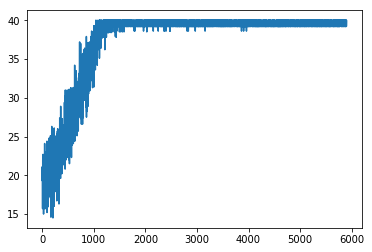

[[1.0000000e+00 1.6491515e-27 3.6496766e-32]
 [1.0000000e+00 4.5876063e-13 9.7442872e-09]
 [9.9820042e-01 9.8792176e-11 1.7995198e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


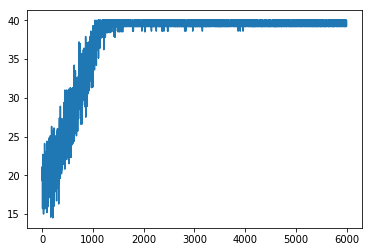

[[1.0000000e+00 5.1499237e-28 8.9401650e-33]
 [1.0000000e+00 2.7772375e-13 6.9614310e-09]
 [9.9830341e-01 6.6779623e-11 1.6965775e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


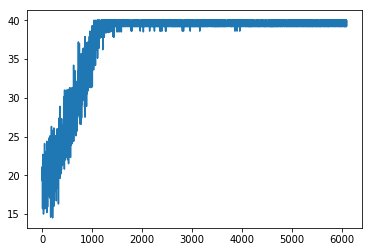

[[1.0000000e+00 1.6082035e-28 2.1899625e-33]
 [1.0000000e+00 1.6812506e-13 4.9732414e-09]
 [9.9840182e-01 4.5121164e-11 1.5981665e-03]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


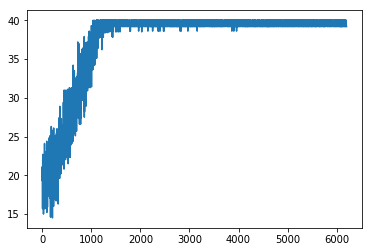

[[1.00000000e+00 5.02203326e-29 5.36448235e-34]
 [1.00000000e+00 1.01777534e-13 3.55287999e-09]
 [9.98496056e-01 3.04716599e-11 1.50394801e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


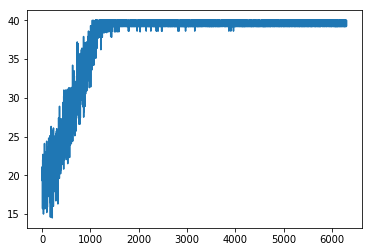

[[1.0000000e+00 1.5682664e-29 1.3140715e-34]
 [1.0000000e+00 6.1612858e-14 2.5381750e-09]
 [9.9858582e-01 2.0570672e-11 1.4142172e-03]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


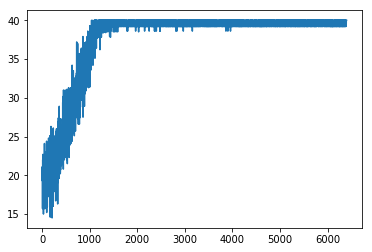

[[1.00000000e+00 4.89733742e-30 3.21891966e-35]
 [1.00000000e+00 3.72984521e-14 1.81327042e-09]
 [9.98671174e-01 1.38815045e-11 1.32884737e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


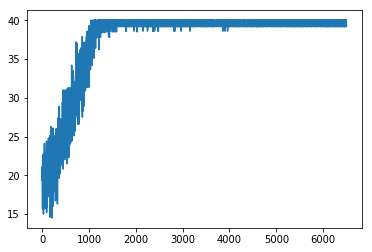

[[1.0000000e+00 1.5293267e-30 7.8849921e-36]
 [1.0000000e+00 2.2579288e-14 1.2953991e-09]
 [9.9875224e-01 9.3643357e-12 1.2477790e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


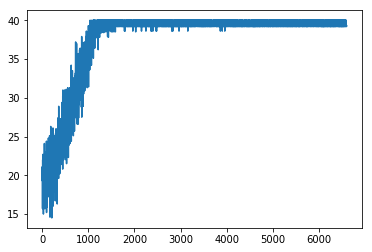

[[1.0000000e+00 4.7757383e-31 1.9314899e-36]
 [1.0000000e+00 1.3668777e-14 9.2543218e-10]
 [9.9882919e-01 6.3149243e-12 1.1708585e-03]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


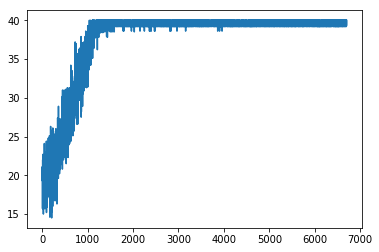

[[1.0000000e+00 1.4913539e-31 4.7313334e-37]
 [1.0000000e+00 8.2746242e-15 6.6112810e-10]
 [9.9890196e-01 4.2572738e-12 1.0980432e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


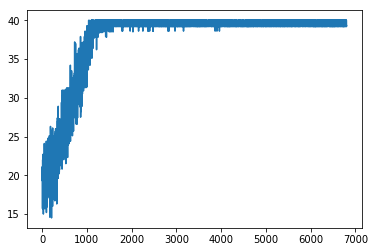

[[1.0000000e+00 4.6571579e-32 1.1591005e-37]
 [1.0000000e+00 5.0092114e-15 4.7230941e-10]
 [9.9897099e-01 2.8690798e-12 1.0290267e-03]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


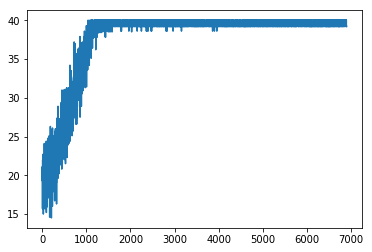

[[1.0000000e+00 1.4543240e-32 2.8398479e-38]
 [1.0000000e+00 3.0324046e-15 3.3741754e-10]
 [9.9903619e-01 1.9329597e-12 9.6377963e-04]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


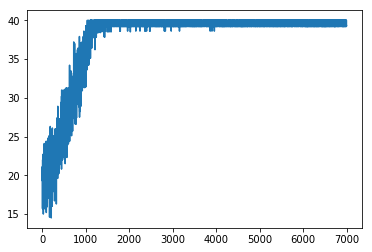

[[1.0000000e+00 4.5415217e-33 6.9577538e-39]
 [1.0000000e+00 1.8357277e-15 2.4105085e-10]
 [9.9909782e-01 1.3019335e-12 9.0220163e-04]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


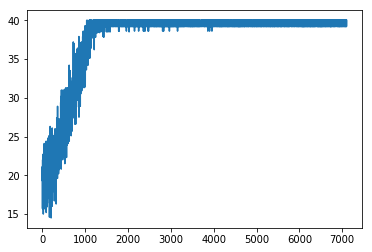

[[1.00000000e+00 1.41821355e-33 1.70468098e-39]
 [1.00000000e+00 1.11128647e-15 1.72206555e-10]
 [9.99155760e-01 8.76715475e-13 8.44186114e-04]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


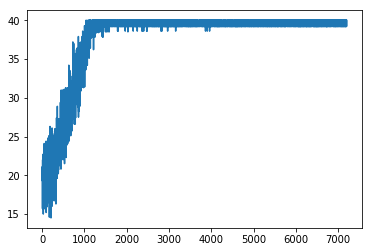

[[1.0000000e+00 4.4287572e-34 4.1765420e-40]
 [1.0000000e+00 6.7273982e-16 1.2302423e-10]
 [9.9921036e-01 5.9027929e-13 7.8963226e-04]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


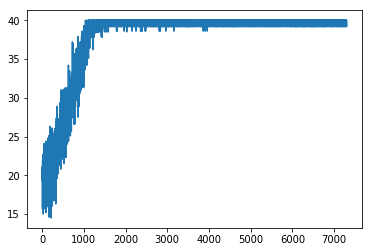

[[1.0000000e+00 1.3829998e-34 1.0232702e-40]
 [1.0000000e+00 4.0725357e-16 8.7888426e-11]
 [9.9926168e-01 3.9735435e-13 7.3834695e-04]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


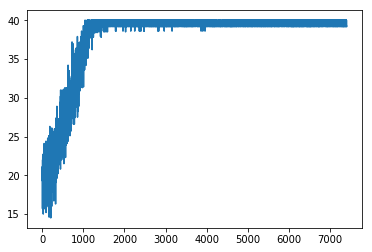

[[1.0000000e+00 4.3187924e-35 2.5070631e-41]
 [1.0000000e+00 2.4653921e-16 6.2787428e-11]
 [9.9930990e-01 2.6742489e-13 6.9008948e-04]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


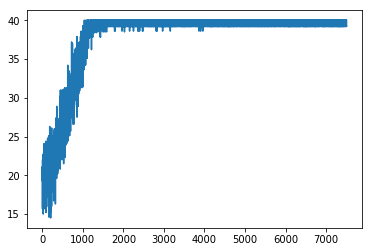

[[1.0000000e+00 1.3486602e-35 6.1418912e-42]
 [1.0000000e+00 1.4924751e-16 4.4855293e-11]
 [9.9935526e-01 1.7994539e-13 6.4473553e-04]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


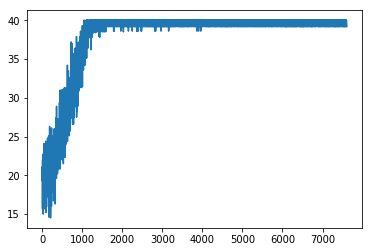

[[1.0000000e+00 4.2115579e-36 1.5049946e-42]
 [1.0000000e+00 9.0358279e-17 3.2044589e-11]
 [9.9939787e-01 1.2106135e-13 6.0215784e-04]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


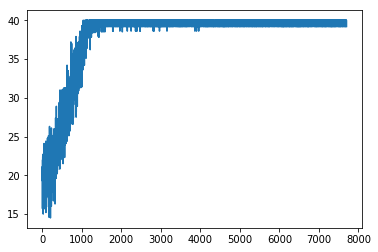

[[1.0000000e+00 1.3151734e-36 3.6854150e-43]
 [1.0000000e+00 5.4705226e-17 2.2892632e-11]
 [9.9943775e-01 8.1431599e-14 5.6219951e-04]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


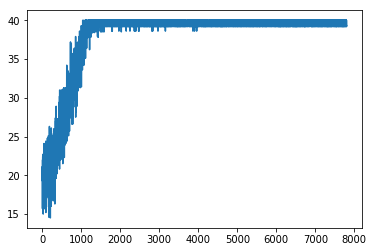

[[1.0000000e+00 4.1069861e-37 8.9683102e-44]
 [1.0000000e+00 3.3119948e-17 1.6354480e-11]
 [9.9947530e-01 5.4767829e-14 5.2475691e-04]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


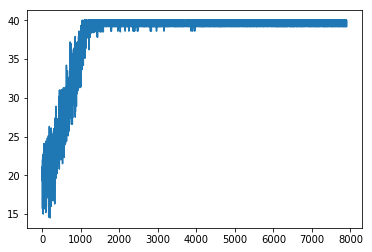

[[1.0000000e+00 1.2825180e-37 2.2420775e-44]
 [1.0000000e+00 2.0051669e-17 1.1683629e-11]
 [9.9951029e-01 3.6829907e-14 4.8967690e-04]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


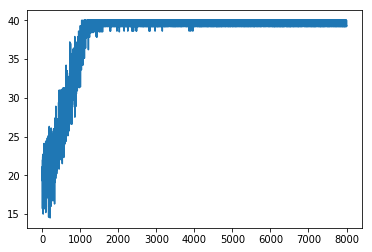

[[1.0000000e+00 4.0050108e-38 5.6051939e-45]
 [1.0000000e+00 1.2139795e-17 8.3467764e-12]
 [9.9954319e-01 2.4763681e-14 4.5681774e-04]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


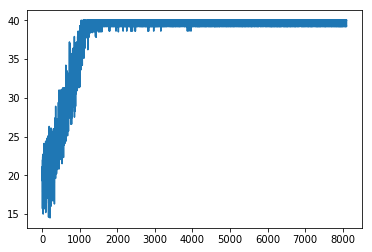

[[1.0000000e+00 1.2506735e-38 1.4012985e-45]
 [1.0000000e+00 7.3497446e-18 5.9629307e-12]
 [9.9957389e-01 1.6648719e-14 4.2606890e-04]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


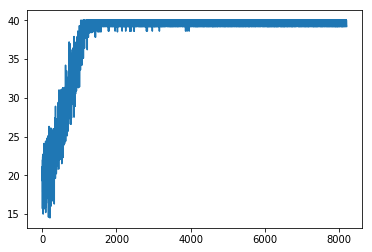

[[1.0000000e+00 3.9055674e-39 0.0000000e+00]
 [1.0000000e+00 4.4497242e-18 4.2599136e-12]
 [9.9960274e-01 1.1191994e-14 3.9731708e-04]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


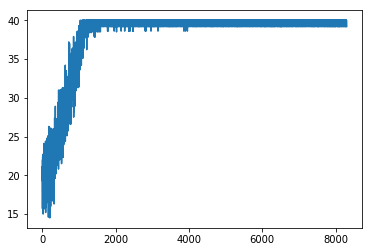

[[1.0000000e+00 1.2196201e-39 0.0000000e+00]
 [1.0000000e+00 2.6939773e-18 3.0432792e-12]
 [9.9962950e-01 7.5229265e-15 3.7042840e-04]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


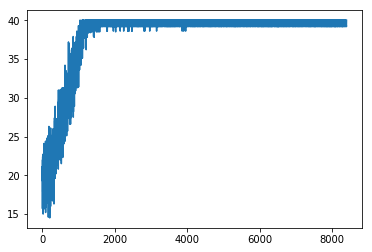

[[1.0000000e+00 3.8085891e-40 0.0000000e+00]
 [1.0000000e+00 1.6310031e-18 2.1741166e-12]
 [9.9965465e-01 5.0561789e-15 3.4528985e-04]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


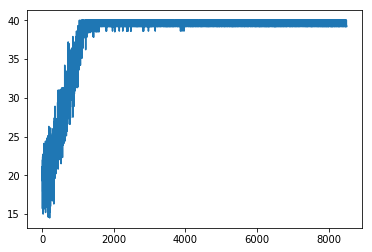

[[1.0000000e+00 1.1893381e-40 0.0000000e+00]
 [1.0000000e+00 9.8745120e-19 1.5531873e-12]
 [9.9967825e-01 3.3979415e-15 3.2179407e-04]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


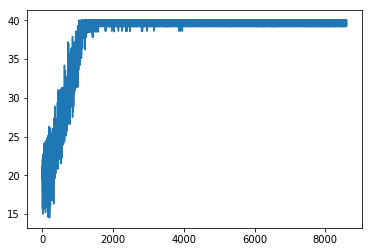

[[1.0000000e+00 3.7140014e-41 0.0000000e+00]
 [1.0000000e+00 5.9782835e-19 1.1095959e-12]
 [9.9970019e-01 2.2833399e-15 2.9984437e-04]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


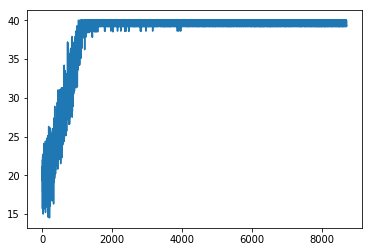

[[1.0000000e+00 1.1598547e-41 0.0000000e+00]
 [1.0000000e+00 3.6194066e-19 7.9269452e-13]
 [9.9972063e-01 1.5342278e-15 2.7934567e-04]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


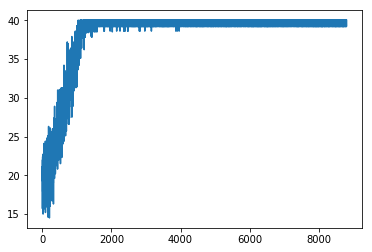

[[1.0000000e+00 3.6223565e-42 0.0000000e+00]
 [1.0000000e+00 2.1912818e-19 5.6630042e-13]
 [9.9973983e-01 1.0308063e-15 2.6021150e-04]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


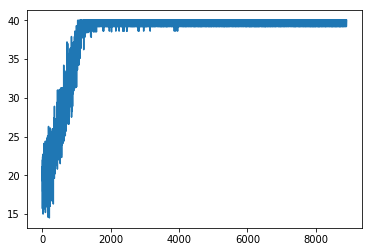

[[1.0000000e+00 1.1308479e-42 0.0000000e+00]
 [1.0000000e+00 1.3266582e-19 4.0456459e-13]
 [9.9975771e-01 6.9251984e-16 2.4235160e-04]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


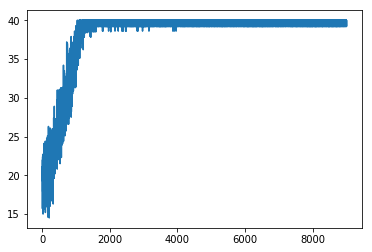

[[1.0000000e+00 3.5312721e-43 0.0000000e+00]
 [1.0000000e+00 8.0319302e-20 2.8902065e-13]
 [9.9977428e-01 4.6520966e-16 2.2567977e-04]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


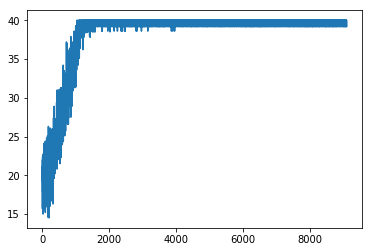

[[1.0000000e+00 1.1070258e-43 0.0000000e+00]
 [1.0000000e+00 4.8627370e-20 2.0647615e-13]
 [9.9978989e-01 3.1249872e-16 2.1013639e-04]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


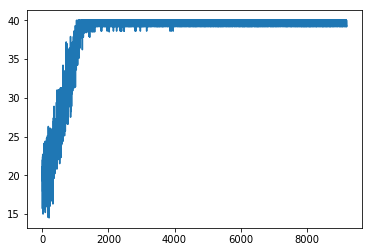

[[1.0000000e+00 3.5032462e-44 0.0000000e+00]
 [1.0000000e+00 2.9440259e-20 1.4750641e-13]
 [9.9980444e-01 2.0990403e-16 1.9564020e-04]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


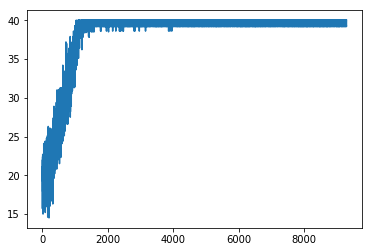

[[1.0000000e+00 1.1210388e-44 0.0000000e+00]
 [1.0000000e+00 1.7823891e-20 1.0537848e-13]
 [9.9981791e-01 1.4098609e-16 1.8212959e-04]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


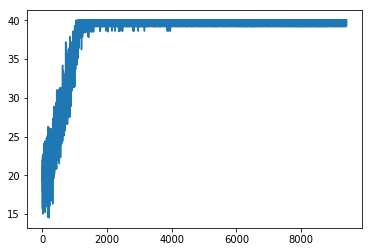

[[1.0000000e+00 2.8025969e-45 0.0000000e+00]
 [1.0000000e+00 1.0791041e-20 7.5282310e-14]
 [9.9983048e-01 9.4690171e-17 1.6953227e-04]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


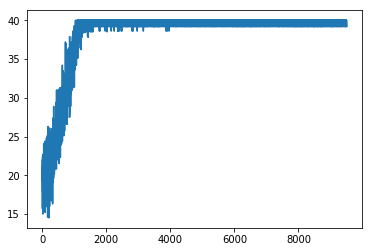

[[1.0000000e+00 1.4012985e-45 0.0000000e+00]
 [1.0000000e+00 6.5331739e-21 5.3781629e-14]
 [9.9984217e-01 6.3595029e-17 1.5779605e-04]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


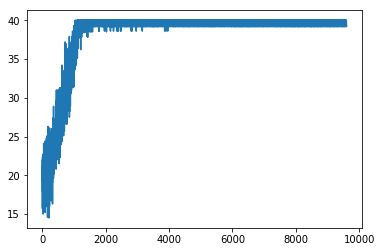

[[1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 3.9553515e-21 3.8421557e-14]
 [9.9985313e-01 4.2707881e-17 1.4685525e-04]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


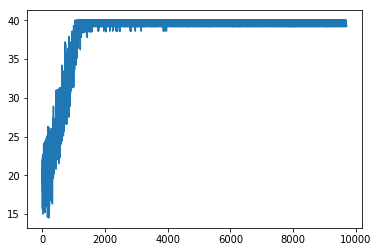

[[1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 2.3946713e-21 2.7448333e-14]
 [9.9986327e-01 2.8681101e-17 1.3666744e-04]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


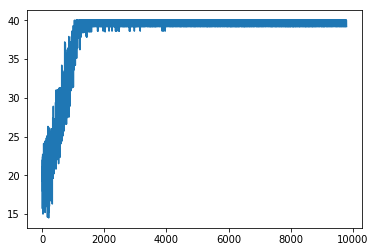

[[1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 1.4497956e-21 1.9609070e-14]
 [9.9987280e-01 1.9259289e-17 1.2716907e-04]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


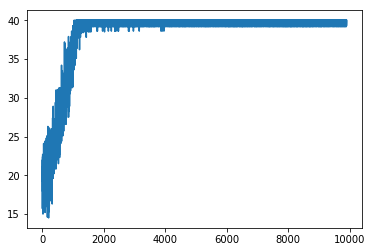

[[1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 8.7774354e-22 1.4008705e-14]
 [9.9988163e-01 1.2932557e-17 1.1832694e-04]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


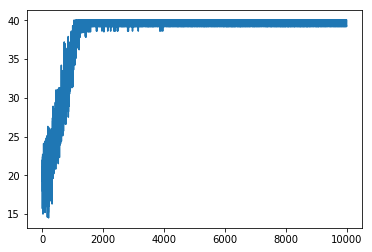

In [5]:
import torch

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.t_policy=torch.autograd.Variable(torch.FloatTensor([[1/3 for x in range(3)] for y in range(3)]), requires_grad=True)
    def forward(self):
        policy = torch.nn.functional.log_softmax(self.t_policy)
        
        return policy

def gt(rewardlist, gamma=0.1):
    '''
    Function um den " total discounted return from time-step t zu berechnen
    >>> gt([10, 2, 3], gamma=0.1)
    10.23
    '''
    summe=0
    for i, value in enumerate(rewardlist):
        summe+=(gamma**i)*value
    return summe

valuelist=[] 
rewards=np.array([10., 2., 3.])/10
model = Model()
optim = torch.optim.SGD([model.t_policy], lr=0.0001)
for i in range(10001): 
    poli=torch.nn.functional.softmax(model.t_policy).data.numpy()
    state_action_list=[] 
    start_state=random.randint(0, 2)
    next_state=start_state
    rewardlist=[] 

    for k in range(40):
        rewardlist.append(rewards[next_state])
        action=np.random.choice(np.arange(0, 3), p=poli[next_state])
        state_action_list.append((next_state, action)) 
        next_state=action 


    rew=gt(rewardlist[:], 0.99)
    grad_list = []
    for j, (state, action) in enumerate(state_action_list):
        value = model()
        value = -value[state, action] * rew
        grad_list.append(value.view(1, -1))

    grads = torch.cat(grad_list, 0).mean()
    grads.backward()
    optim.step()
    value=(gt(rewardlist, 1))
    valuelist.append(value)


    if i%100==0:
        print(poli)
        print(rewardlist)
        plt.plot(valuelist)
        plt.show()

# Value Iteration



In [27]:
import numpy as np

rewards=np.array([10., 2., 3.])

state_value_function=np.array([0 for i in range(3)])
print('V_{} = {}'.format(0,state_value_function))
for i in range(1000):
    s_v_f=state_value_function.copy()
    for s in range(3):
        state_value_function[s]=max(rewards[s]+0.1*state_value_function[s_prime] for s_prime  in range(3))
    if i%100==99:
        print('V_{} = {}'.format(i+1,state_value_function))

V_0 = [0 0 0]
V_100 = [11  3  4]
V_200 = [11  3  4]
V_300 = [11  3  4]
V_400 = [11  3  4]
V_500 = [11  3  4]
V_600 = [11  3  4]
V_700 = [11  3  4]
V_800 = [11  3  4]
V_900 = [11  3  4]
V_1000 = [11  3  4]


# Policy Gradient for the CartPole task

In [19]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import gym
import random

env = gym.make('CartPole-v0')
env.seed(1)

print("env.action_space", env.action_space)
print("env.observation_space", env.observation_space)
print("env.observation_space.high", env.observation_space.high)
print("env.observation_space.low", env.observation_space.low)


RENDER_ENV = False
EPISODES = 5000
rewards = []
RENDER_REWARD_MIN = 50

import numpy as np
class PolicyGradient(nn.Module):
    def __init__(self):
        super(PolicyGradient, self).__init__()
        self.linear = nn.Linear(4, 8)
        self.linear2 = nn.Linear(8, 2)
    def forward(self, state):
        input1 = torch.autograd.Variable(torch.FloatTensor([state]))
        return F.log_softmax(self.linear2(F.sigmoid(self.linear(input1))))
    
criterion = torch.nn.NLLLoss()
policy = PolicyGradient()
optimizer = torch.optim.RMSprop(policy.parameters(), lr=0.002)
env.reset()
decay=1
import random
import numpy as np
import math
import matplotlib.pyplot as plt
resultlist=[]
for episode in range(EPISODES):
    observations = []
    observation = env.reset()
    while True:
        action = int(np.random.choice(range(2), p=np.exp(policy(observation).data.numpy()[0])))
        observation_, reward, finished, info = env.step(action)
        observations.append((observation, action, reward, observation_))
        observation=observation_
        if finished:
            rewardlist = [x[2] for x in observations]
            cumulative=0
            savelist=[]
            for rew in rewardlist[::-1]:
                cumulative=cumulative*decay + rew/200
                savelist.append(cumulative)
            savelist=savelist[::-1]
            resultlist.append(savelist[0])
            if episode%50==0:
                plt.plot(resultlist)
                plt.show()
            savelist=np.array(savelist)
            for (observation, action, reward, next_observation), cum_reward in zip(observations, savelist):
                action = torch.autograd.Variable(torch.LongTensor([action]))
                result = policy(observation)
                loss = criterion(result, action)
                (loss * cum_reward).backward()
                optimizer.step()
                optimizer.zero_grad()
            break

ModuleNotFoundError: No module named 'gym'

# Actor Critic for the CartPole task

In [20]:
import numpy as np
class PolicyGradient(nn.Module):
    def __init__(self):
        super(PolicyGradient, self).__init__()
        self.linear = nn.Linear(4, 8)
        self.linear2 = nn.Linear(8, 2)
    def forward(self, state):
        input1 = torch.autograd.Variable(torch.FloatTensor([state]))
        return F.log_softmax(self.linear2(F.sigmoid(self.linear(input1))))
    
class Critic(nn.Module):
    def __init__(self):
        super(Critic, self).__init__()
        self.linear = nn.Linear(4, 8)
        self.linear2 = nn.Linear(2, 4)
        self.linear3 = nn.Linear(12, 1)
        
    def forward(self, state, action):
        input1 = torch.autograd.Variable(torch.FloatTensor([state]))
        one_hot_action = np.zeros(2, dtype=np.float)
        one_hot_action[action] = 1.0
        input2 = torch.autograd.Variable(torch.FloatTensor([one_hot_action]))
        a1 = self.linear(input1)
        a2 = self.linear2(input2)
        a3 = torch.cat([a1, a2], 1)
        a4 = F.relu(a3)
        return (self.linear3(a4))
        
criterion = torch.nn.NLLLoss()
critic_loss = torch.nn.MSELoss()
policy = PolicyGradient()
critic = Critic()
optimizer = torch.optim.RMSprop(policy.parameters(), lr=0.002)
optimizer_critic = torch.optim.RMSprop(critic.parameters(), lr=0.002)
env.reset()
decay=1
import random
import numpy as np
import math
import matplotlib.pyplot as plt
resultlist=[]
for episode in range(EPISODES):
    observations = []
    observation = env.reset()
    while True:
        action = int(np.random.choice(range(2), p=np.exp(policy(observation).data.numpy()[0])))
        observation_, reward, finished, info = env.step(action)
        observations.append((observation, action, reward, observation_))
        observation=observation_
        if finished:
            rewardlist = [x[2] for x in observations]
            cumulative=0
            savelist=[]
            for rew in rewardlist[::-1]:
                cumulative=cumulative*decay + rew/200
                savelist.append(cumulative)
            savelist=savelist[::-1]

            resultlist.append(savelist[0])
            if episode%50==0:
                plt.plot(resultlist)
                plt.show()
            savelist=np.array(savelist)
            for (observation, action, reward, next_observation), cum_reward in zip(observations, savelist):
                crit_score = critic(observation, action)
                loss = critic_loss(crit_score, torch.autograd.Variable(torch.FloatTensor([cum_reward])).view(1, 1))
                loss.backward()
                optimizer.zero_grad()
                optimizer_critic.step()
                optimizer_critic.zero_grad()
                crit_score = float(critic(observation, action).data.numpy()[0][0])
                action = torch.autograd.Variable(torch.LongTensor([action]))
                result = policy(observation)
                loss = criterion(result, action)
                (loss * crit_score).backward()
                optimizer.step()
                optimizer.zero_grad()
            break

NameError: name 'env' is not defined